# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [32]:
#import numpy and pandas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. We will load the dataset below.

In [33]:
# Run this code:

kickstarter = pd.read_csv('../ks-projects-201801.csv')

Now print the `head` function to examine the dataset.

In [34]:
# Your code here:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column. You can read more about the mode function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html).

In [35]:
# Your code here:
import scipy.stats
from scipy.stats import mode

print(kickstarter['currency'].mode())
print(kickstarter['country'].mode())

0    USD
dtype: object
0    US
dtype: object


The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

In [36]:
# Your code here:
from scipy import stats
from scipy.stats import tmean

tmean = tmean(kickstarter['goal'], (0, 75))

tmean

28.02929089026915

Please compare the trimmed mean you calculated above to the untrimmed mean of the same column. What do the results tell you about this variable?

In [37]:
# your answer here:
kickstarter['goal'].mean()

# The different is much between the meana nd the trimmed mean, trimmed mean only took 0-75th percentile of the 'goal'
# column


49080.79152056854

#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, click [here](https://en.wikipedia.org/wiki/Fisher%27s_exact_test).

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

In [38]:
# Your code here:
from scipy.stats import fisher_exact
kickstarter['goal_met'] = np.where((kickstarter['usd_pledged_real']) > (kickstarter['usd_goal_real']), 1,0)
kickstarter.head(60)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,0


Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [39]:
# Your code here:

kickstarter['usd'] = np.where(kickstarter['currency'] == 'USD', 1,0) 
kickstarter

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,0,1
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,0,1
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,0,1
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,0,1


Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [40]:
from scipy.stats import fisher_exact
cross = pd.crosstab(kickstarter['goal_met'], kickstarter['usd'])
fisher_exact(cross)

(1.3791838163150314, 9.78e-321)

# Challenge 2 - The `linalg` submodule

This submodule allows us to perform various linear algebra calculations. You can find it under `scipy.linalg`. Please import the `solve` function from this submodule.

Using the solve function, find the solution of the equation system 5x + 2y = 3 and 3x + y = 2 in the cell below.

In [41]:
# Your code here:
from scipy.linalg import solve

a = [[5, 2],[3, 1]]
b = [3, 2]
solve(a, b)



array([ 1., -1.])

# Challenge 3 - The `interpolate` submodule

This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data. The goal here in challenge 3 is to take the dataset that contains few observations due to sampling and fill all observations with a value using the interpolation function. We will accomplish this in a number of steps.

In the cell below, import the `interp1d` function (this is the number 1 in the name, not the letter l!) and first take a sample of 10 rows from `kickstarter`. You can do this using the `sample` method for dataframes.

In [42]:
# Your code here:
from scipy.interpolate import interp1d
sample = kickstarter.sample(10)
sample


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
175599,1893174465,A documentary about The Queen of Burundi,Documentary,Film & Video,NOK,2015-06-04,250000.0,2015-05-05 12:35:24,805.0,failed,3,NO,105.82,102.52,31838.62,0,0
134901,1684770746,Starter Shield for Arduino,DIY Electronics,Technology,USD,2015-04-16,1500.0,2015-03-17 21:51:09,552.0,failed,14,US,552.00,552.00,1500.00,0,1
155702,1791927745,"""Coaster your phone.""",Technology,Technology,USD,2017-08-27,20000.0,2017-07-28 14:53:01,201.0,failed,3,US,0.00,201.00,20000.00,0,1
221207,2126714395,Triangulum (Canceled),Video Games,Games,AUD,2015-01-25,175000.0,2014-11-26 02:14:44,1.0,canceled,1,AU,0.87,0.78,136112.62,0,0
25208,1127991327,"Leebre.org - Liberate fiction with free, socia...",Software,Technology,USD,2012-02-01,3000.0,2012-01-02 00:00:49,3431.0,successful,142,US,3431.00,3431.00,3000.00,1,1
5021,1025659236,GBS Detroit Presents Raven Love (Canceled),Indie Rock,Music,USD,2013-09-20,1200.0,2013-09-06 05:10:14,281.0,canceled,10,US,281.00,281.00,1200.00,0,1
200348,2020315840,OSIRI.IO (Canceled),Web,Technology,USD,2015-05-02,15000.0,2015-04-02 20:26:21,3343.0,canceled,40,US,3343.00,3343.00,15000.00,0,1
275043,469488327,Dear Parents,Family,Film & Video,EUR,2017-05-09,333.0,2017-04-09 15:56:33,1.0,failed,1,FR,0.00,1.09,362.17,0,0
85999,143734518,The Hungry Wolves: An illustrated picture book.,Comics,Comics,CAD,2014-03-12,3000.0,2014-02-10 17:31:54,6489.0,successful,131,CA,5881.53,5852.80,2705.87,1,0
219078,2115807004,Straighten Up and Die Right (Canceled),Shorts,Film & Video,USD,2012-08-07,2500.0,2012-06-28 21:37:06,255.0,canceled,2,US,255.00,255.00,2500.00,0,1


Next, create a linear interpolation of the backers as a function of `usd_pledged_real`. For this, you can use the `interp1d` function, which you can read about more [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html). The `interp1d` function will output an object, which we can use as a linear interpolation of backers as predicted by the amount of real pledged dollars. Save this object as `f.`

In [43]:
# Your code here:

f = interp1d(sample.backers, sample.usd_pledged_real)

Now create a new variable called `x_new`, which contain all integers between the minimum number of backers in our sample (min) and the maximum number of backers (max).

Hint: one option to accomplish this is to use the `np.arange` function with appropriate min and max values.

In [44]:
# Your code here:

x_new = np.arange(min(sample.backers), max(sample.backers))
print(x_new)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141]


Plot function f for all values of `x_new`. Run the code below.

/Users/sholaayodz/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/sholaayodz/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


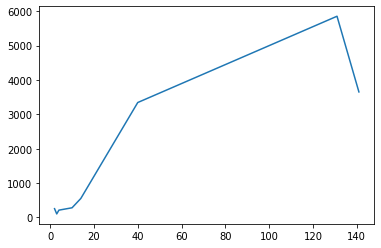

In [45]:
# Run this code:

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, f(x_new))

Next create a function that will generate a cubic interpolation function (you can accomplish this also with `interp1d`). Name the function `g`

In [47]:
# Your code here:
from scipy.interpolate import CubicSpline
g = interp1d(sample.backers, sample.usd_pledged_real, kind = 'cubic')


ValueError: Expect x to be a 1-D sorted array_like.

In [ ]:
# Run this code:

plt.plot(x_new, g(x_new))

# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](https://en.wikipedia.org/wiki/Binomial_distribution) and about the `binom` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

In the cell below, compute the probability that a die lands on 5 exactly 3 times in 8 tries.

Hint: the probability of rolling a 5 is 1/6.

In [ ]:
# Your code here:

from scipy.stats import binom

binom.pmf(3, 8, 1/6)